
# Explore

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env

# connection function for accessing mysql
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# query to acquire the iris data
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

# function to get the data and run the query
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

# acquire the data
df = get_data()

In [2]:
df

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,3
146,147,6.3,2.5,5.0,1.9,virginica,3
147,148,6.5,3.0,5.2,2.0,virginica,3
148,149,6.2,3.4,5.4,2.3,virginica,3


In [3]:
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [4]:
df = prep_iris_inline(df)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exercise 1

Split your data into train, validate, and test samples.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [9]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

## Exercise 2

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [10]:
melted = train.melt(id_vars=['species'])

In [11]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   336 non-null    object 
 1   variable  336 non-null    object 
 2   value     336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


In [12]:
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))

<AxesSubplot:xlabel='variable', ylabel='value'>

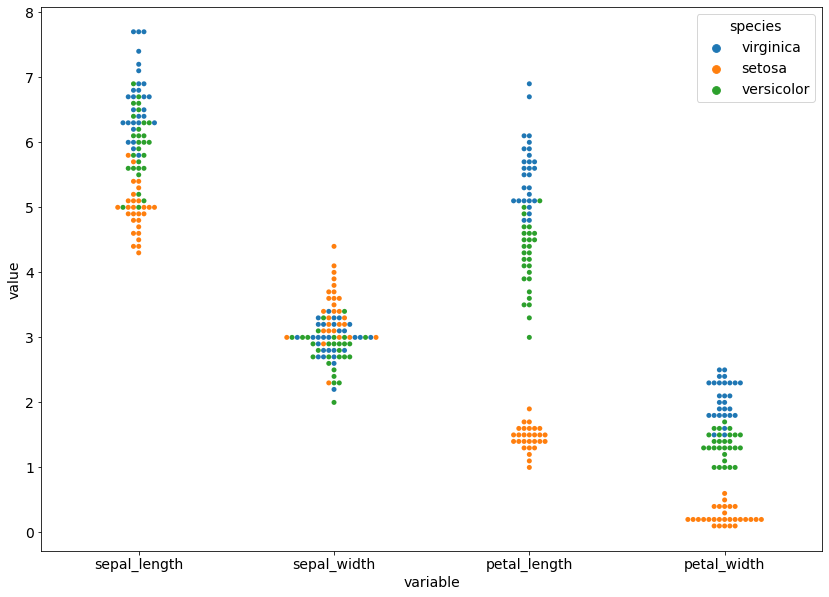

In [13]:
sns.swarmplot(data=melted, x='variable', y='value', hue='species')

**Takeaways** 
- petal_length and petal_width show the most seperation between species.
- Could petal and sepal area be useful features? 
- viginica iris have the largest petals. 
- setosa iris have the smallest petals. 
- setosa seem to have wide & short sepals. 

## Exercise 3

Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

What are your takeaways?

In [14]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [15]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
138,6.0,3.0,4.8,1.8,virginica,18.00,8.64
7,5.0,3.4,1.5,0.2,setosa,17.00,0.30
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
74,6.4,2.9,4.3,1.3,versicolor,18.56,5.59
97,6.2,2.9,4.3,1.3,versicolor,17.98,5.59


In [16]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [17]:
combos[0]

('sepal_length', 'sepal_width')

In [18]:
train.groupby('species')['sepal_area'].sum()

species
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [19]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

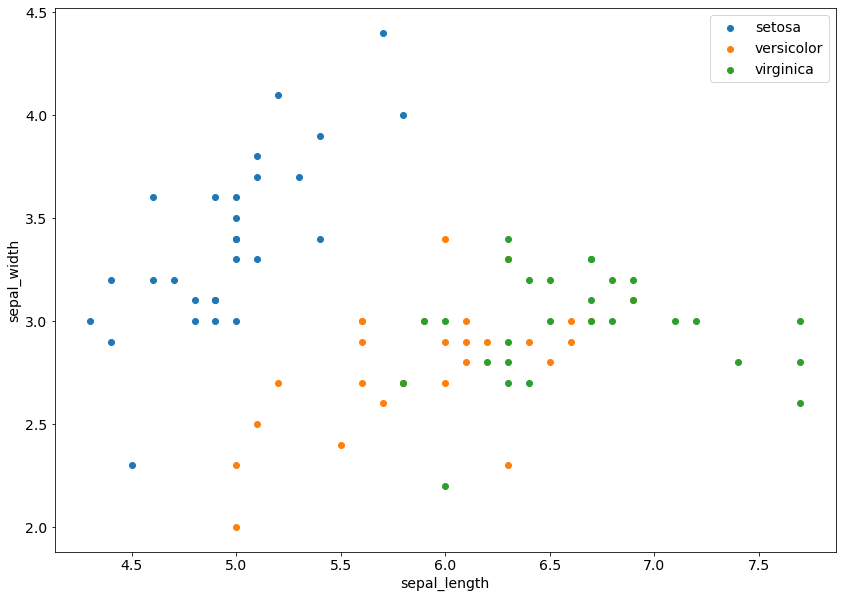

In [20]:
# test it with one plot
scatter_species(x,y)

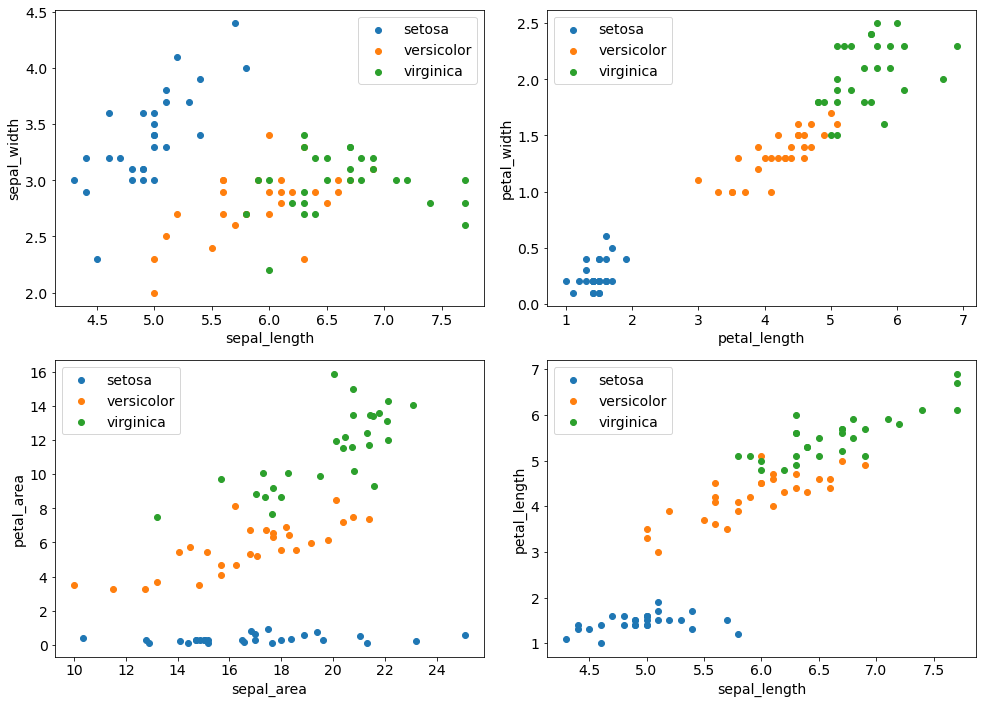

In [21]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

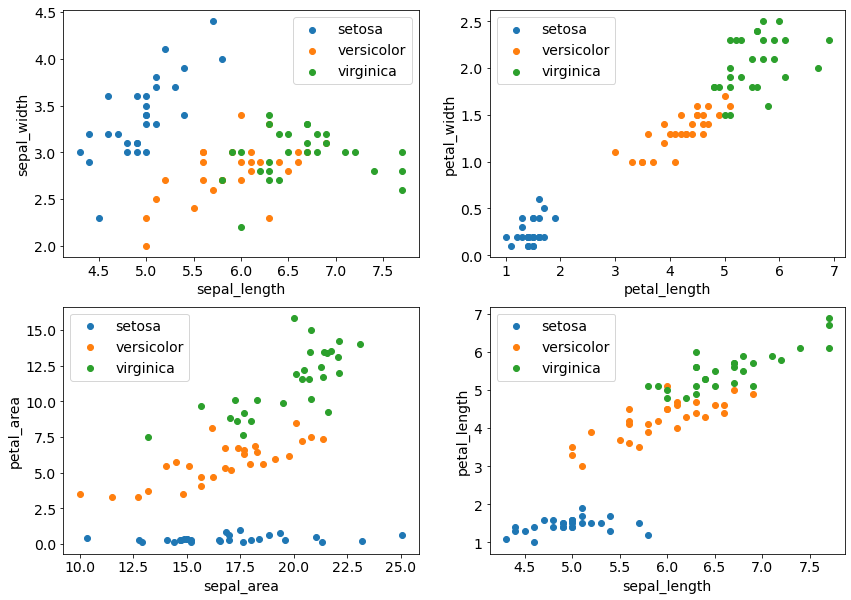

In [22]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

**Takeaways**

- sepal_length is useful, sepal_width not great but likely adds some value. 
- petal_area is very useful, as we would expect given the previous plot of petal_width x petal length. 
- sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton. 

## Exercise 4

Create a heatmap of each variable layering correlation coefficient on top.

*n.b. Please do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.*

In [23]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.166612,0.900357,0.860775,0.685879,0.885277
sepal_width,-0.166612,1.000000,-0.415310,-0.323396,0.599240,-0.272634
petal_length,0.900357,-0.415310,1.000000,0.965383,0.429428,0.958520
petal_width,0.860775,-0.323396,0.965383,1.000000,0.473277,0.980366
sepal_area,0.685879,0.599240,0.429428,0.473277,1.000000,0.526012
petal_area,0.885277,-0.272634,0.958520,0.980366,0.526012,1.000000


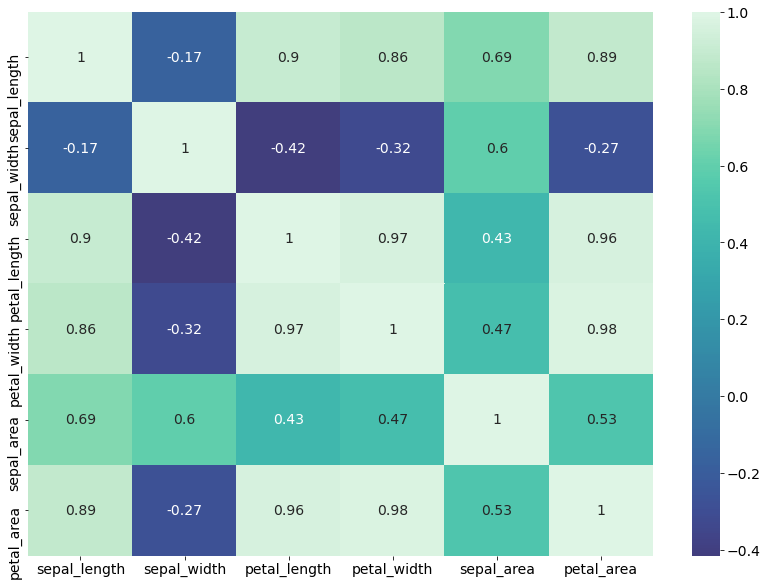

In [24]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

**Takeaways**

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.  

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no **LINEAR** correlation: sepal length & sepal width. 

## Exercise 5

Create a scatter matrix visualizing the interaction of each variable.

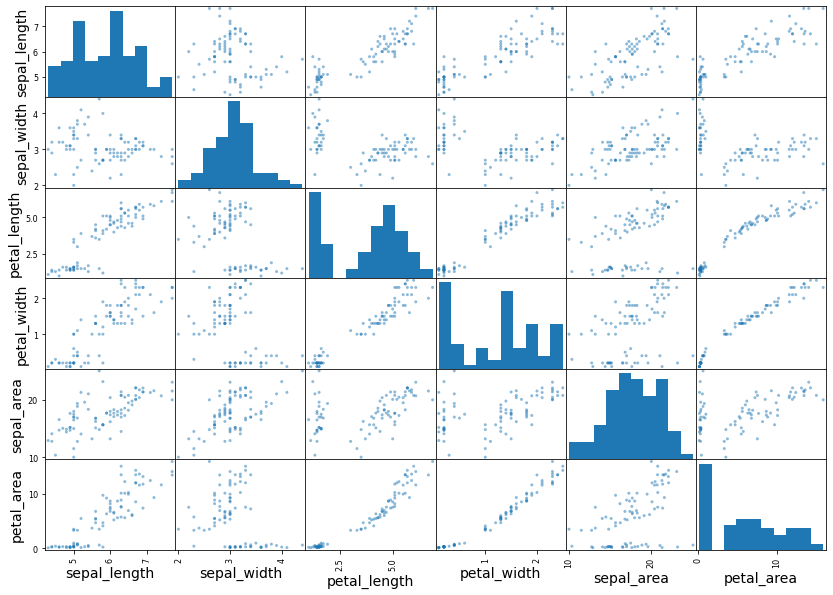

In [25]:
pd.plotting.scatter_matrix(train)
plt.show()

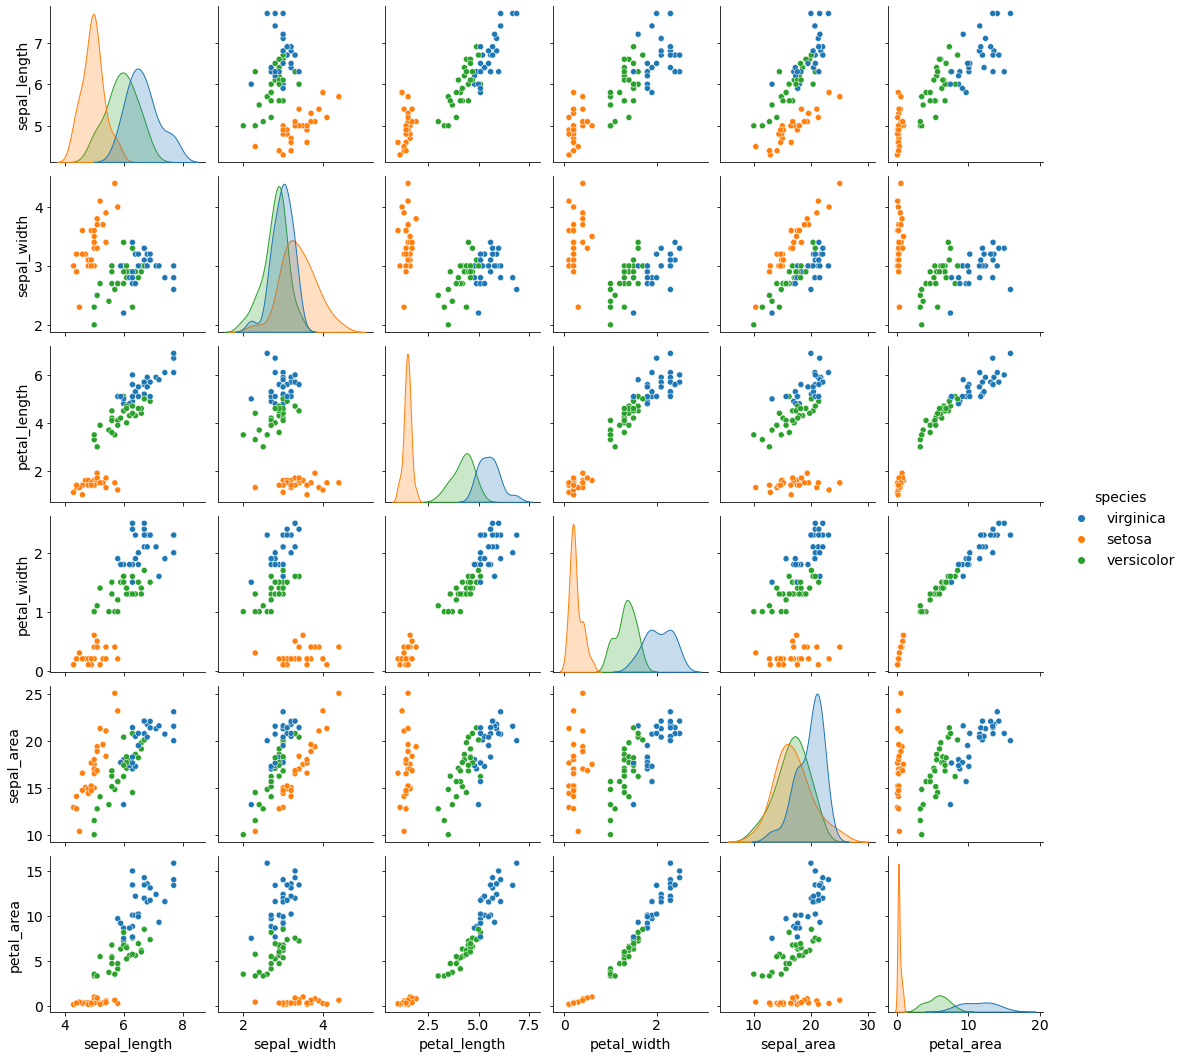

In [26]:
sns.pairplot(train, hue='species')
plt.show()

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
 5   sepal_area    84 non-null     float64
 6   petal_area    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.2+ KB


**Takeaways** 

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine. 
- petal area seems to show the largest separation between virginica & versicolor of all the individual features. 
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say. 
- virginica and versicolor show little to no difference when it comes to the width of the sepals. 

In [28]:
# Is the sepal length significantly different in virginica compared to versicolor?

## Exercise 6

**Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [29]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

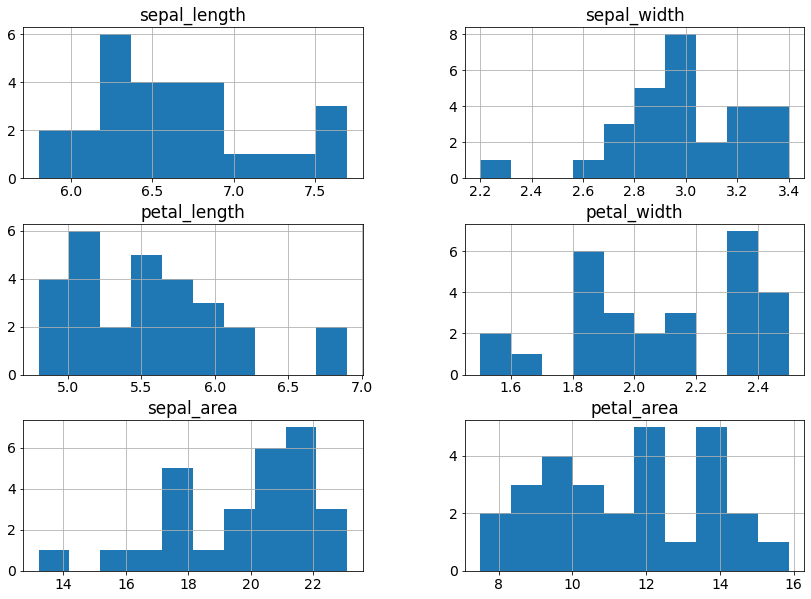

In [30]:
virginica.hist()
plt.show()

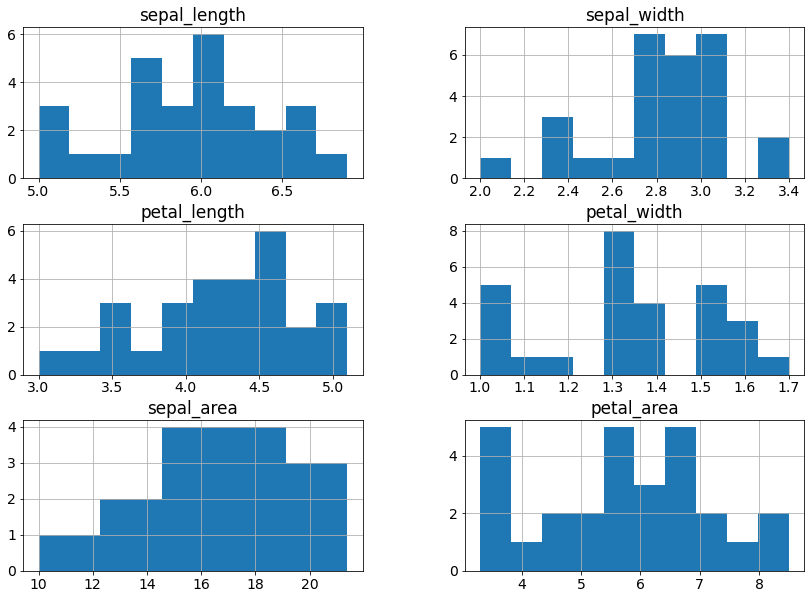

In [31]:
versicolor.hist()
plt.show()

In [32]:
virginica.describe()['sepal_length']['std']

0.532985998009398

In [33]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.935714
std       0.512231
min       5.000000
25%       5.600000
50%       6.000000
75%       6.300000
max       6.900000
Name: sepal_length, dtype: float64

In [34]:
import scipy.stats as stats

In [35]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [36]:
tstat

5.11297615624047

In [37]:
p

4.304267066877367e-06

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

## Exercise 7

Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05

- $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [38]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=250.0, pvalue=0.009508012794926874)

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 

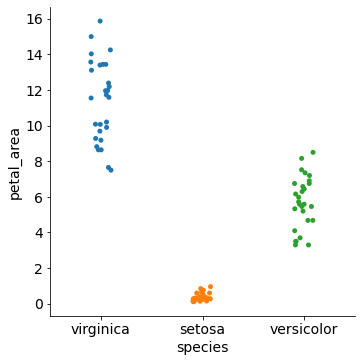

In [39]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

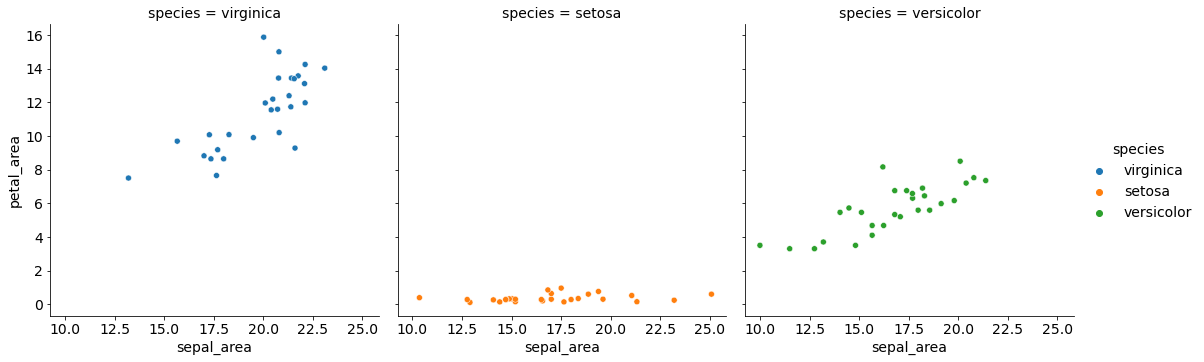

In [40]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')